# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data
## Part 1: Reading and Writing Files in Python

Mark Bauer

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [1. Search NYC Open Data in Google](##1.-Search-NYC-Open-Data-in-Google)
       * [2. Search "Building Footprints" in NYC Open Data search bar](##-2.-Search-"Building-Footprints"-in-NYC-Open-Data-search-bar)
       * [3. Select "Building Footprints" Dataset](##3.-Select-"Building-Footprints"-Dataset)
       * [4. The Building Footprints Dataset Page](##4.-The-Building-Footprints-Dataset-Page)
       
       
   * [1. Reading In Data](##-1.-Reading-In-Data)
       * [1.1 Reading in data as csv in static form](##-1.1-Reading-in-data-as-csv-in-static-form)
       * [1.2 Reading in data as json in static form](##-1.2-Reading-in-data-as-json-in-static-form)
       * [1.3 Reading in shapefile data](##-1.3-Reading-in-shapefile-data)
       * [1.4 Unzipping and reading in data as csv in memory](##-1.4-Unzipping-and-reading-in-data-as-csv-in-memory)
       * [1.5 Unzipping and reading in data as csv to local folder](##-1.4-Unzipping-and-reading-in-data-as-csv-to-local-folder)
       * [1.6 Unzipping and reading in data as csv from local folder](##-1.4-Unzipping-and-reading-in-data-as-csv-from-local-folder)
       * [1.7 Reading in data from Socrata Open Data API (SODA)](##-1.5-Reading-in-data-from-Socrata-Open-Data-API-%28SODA%29)
       
       
   * [2. Writing Out Data](#-2.-Writing-Out-Data)
       * [2.1 Writing to a CSV file](##-2.1-Writing-to-a-CSV-file)
       * [2.2 Writing to a Excel (xlsx) file](##-2.2-Writing-to-a-Excel-%28xlsx%29-file)
       * [2.3 Writing to a JSON file](##-2.3-Writing-to-a-JSON-file)
       
       
   * [3. Reading In Data from Local Folder](#-3.-Reading-In-Data-from-Local-Folder)
       * [3.1 Reading in a CSV file](##-3.1-Reading-in-a-CSV-file)
       * [3.2 Reading in an Excel file](##-3.2-Reading-in-an-Excel-file)
       * [3.3 Reading in a JSON file](##-3.3-Reading-in-a-JSON-file)
       
       
   * [4. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various ways to read (load) and write (save) data from NYC Open Data. Specifically, we will focus on reading our data into a pandas dataframe.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import os
import urllib
import json
import requests
from io import BytesIO
from sodapy import Socrata
import zipfile
from zipfile import ZipFile
from os.path import basename
from openpyxl import Workbook

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

Documention for installing watermark: https://github.com/rasbt/watermark

In [6]:
%load_ext watermark

%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
geopandas 0.8.1
matplotlib.pyplot 3.3.2
json 2.0.9
requests 2.25.1
sodapy 2.0.0


# Getting Started: Accessing the Building Footprints Dataset

## 1. Search NYC Open Data in Google

![building_footprints](images/1.nyc-open-data-google.png)

## 2. Search "Building Footprints" in NYC Open Data search bar

![building_footprints](images/2.building-footprints-opendata-search.png)

## 3. Select "Building Footprints" Dataset

![building_footprints](images/3.building-footprints-dataset-link.png)

## 4. The Building Footprints Dataset Page

![building_footprints](images/4.data-homepage.png)

Dataset Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

**Building Footprints Dataset Identification**

> **Here are a few things to note about the data:**
>
> - **Purpose:** This feature class is used by the NYC DOITT GIS group to maintain and distribute an accurate 'basemap' for NYC. The basemap provides the foundation upon virtually all other geospatial data with New York.
> - **Description:** Building footprints represent the full perimeter outline of each building as viewed from directly above. Additional attribute information maintained for each feature includes: Building Identification Number (BIN); Borough, Block, and Lot information(BBL); ground elevation at building base; roof height above ground elevation; construction year, and feature type.
> - **Source(s):** Annually captured aerial imagery, NYC Research of DOB records, or other image resources.
> - **Publication Dates:** **Data**: 05/03/16<br>
> - **Last Update:** Weekly<br>
> - **Metadata:** 12/22/2016<br>
> - **Update Frequency:** Features are updated daily by DoITT staff and a public release is available weekly on NYC Open Data. Every four years a citywide review is made of the building footprints and features are updated photogrammetrically.
> - **Available Formats:** File Geodatabase Feature Class as part of the Planimetrics geodatabase and individual shapefile on the [NYC Open Data Portal](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh)
> - **Use Limitations:** Open Data policies and restrictions apply. See [Terms of Use](http://www.nyc.gov/html/data/terms.html)
> - **Access Rights:** Public
> - **Links:** https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh
> - **Tags:** Buildings, Building footprint, BIN, Structure

**Source:** 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Reading In Data

## 1.1 Reading in data as csv in static form

![building_footprints_csv](images/building-footprints-csv.png)

# NOTE: 
The buildings footprints `dataset identifier` changes weekly, and so does the data api path. Click on the API Docs page and verify the correct dataset identifier. If you're not working with the correct id, you will receive a `HTTP Error`. Screenshots below:

**Click on API Docs**
![building_footprints_csv](images/api_docs.png)

**Grab the updated dataset identifier**
![building_footprints_csv](images/api_docs_dataset_id.png)

The `dataset identifier` is inserted into the api path below:  
url = https://data.cityofnewyork.us/api/views/DATASET_IDENTIFIER/rows.csv?accessType=DOWNLOAD

In [8]:
# reading in data as a url from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'

# saving data as a pandas dataframe named 'building_footprints_csv'
building_footprints_csv = pd.read_csv(url)

In [9]:
# previewing the first five rows 
building_footprints_csv.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,1925.0,3170958,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,1965.0,5028452,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,1970.0,5078368,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,1928.0,3245111,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,1950.0,4161096,MULTIPOLYGON (((-73.75421559146167 40.75591276...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


In [10]:
# printing the dimentions (i.e. rows, columns) of the data
building_footprints_csv.shape

(1084416, 15)

In [11]:
# more readable

rows, columns = building_footprints_csv.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,416 rows and 15 columns.


**Sanity check**

We use pandas `.head()` method to preview the first five rows of the dataframe.

We use pandas `.shape` method to print the dimensions of the dataframe (i.e. number of rows, number of columns).

We will use these two methods throughout the examples.

## 1.2 Reading in data as json in static form

![building_footprints_csv](images/building-footprints-json.png)

In [12]:
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.json?accessType=DOWNLOAD'

# loads a json object as a python object
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [15]:
# identifying type of python object
type(data)

dict

In [16]:
data.keys()

dict_keys(['meta', 'data'])

In [20]:
type(data['data'])

list

In [21]:
len(data['data'])

1084416

In [22]:
# previewing the first row in our data section of our python object
data['data'][0]

['row-c4wk.4gg6_5rds',
 '00000000-0000-0000-8AE8-C912374ACA69',
 0,
 1638825337,
 None,
 1638825337,
 None,
 '{ }',
 '1925',
 '3170958',
 'MULTIPOLYGON (((-73.96664570466969 40.62599676998362, -73.96684846176461 40.62597749086253, -73.96685938726297 40.62604419372406, -73.96661621040211 40.62606731716105, -73.96660638332114 40.62600732436975, -73.96664680403327 40.626003480977246, -73.96664570466969 40.62599676998362)))',
 None,
 1503360000,
 'Constructed',
 '96807',
 '29.74985318',
 '2100',
 '40',
 '0',
 '0',
 '3065220021',
 '3065220021',
 'Photogramm']

In [23]:
data['meta'].keys()

dict_keys(['view'])

In [24]:
keys = data['meta']['view'].keys()

for key in keys:
    print(key)

id
name
assetType
averageRating
createdAt
displayType
downloadCount
hideFromCatalog
hideFromDataJson
newBackend
numberOfComments
oid
provenance
publicationAppendEnabled
publicationDate
publicationGroup
publicationStage
rowsUpdatedAt
rowsUpdatedBy
tableId
totalTimesRated
viewCount
viewLastModified
viewType
approvals
columns
grants
owner
query
rights
tableAuthor
flags


In [26]:
# locating our columns (i.e. field names) and saving as a new variable called 'cols'
cols = data['meta']['view']['columns']

# previewing first five
cols[:5]

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']}]

In [27]:
for item in cols:
    print(item['fieldName'])

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
cnstrct_yr
bin
the_geom
name
lstmoddate
lststatype
doitt_id
heightroof
feat_code
groundelev
shape_area
shape_len
base_bbl
mpluto_bbl
geomsource


In [28]:
# saving our field names as a variable
fieldName = {x['fieldName']: x for x in cols}

# printing the field names in our data
for key in fieldName.keys():
    print(key)

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
cnstrct_yr
bin
the_geom
name
lstmoddate
lststatype
doitt_id
heightroof
feat_code
groundelev
shape_area
shape_len
base_bbl
mpluto_bbl
geomsource


In [29]:
# saving our field names in a list
columns = [*fieldName]
building_footprints_json = pd.DataFrame(data['data'], columns=columns)

# identifying columns not required for analysis
drop_columns = [':sid', 
                ':id', 
                ':position', 
                ':created_at', 
                ':created_meta', 
                ':updated_at', 
                ':updated_meta', 
                ':meta']

# dropping columns not required for analysis
building_footprints_json = building_footprints_json.drop(drop_columns, axis=1)
building_footprints_json.head()

,cnstrct_yr,bin,the_geom,name,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource
0,1925,3170958,MULTIPOLYGON (((-73.96664570466969 40.62599676...,None,1503360000,Constructed,96807,29.74985318,2100,40,0,0,3065220021,3065220021,Photogramm
1,1965,5028452,MULTIPOLYGON (((-74.16790202462265 40.63936048...,None,1503360000,Constructed,326368,22.63,2100,39,0,0,5012640036,5012640036,Photogramm
2,1970,5078368,MULTIPOLYGON (((-74.19510813278613 40.55610681...,None,1503360000,Constructed,746627,35.76,2100,51,0,0,5060190091,5060190091,Photogramm
3,1928,3245111,MULTIPOLYGON (((-73.96113466505085 40.57743931...,None,1503360000,Constructed,786626,37.5,2100,6,0,0,3086910048,3086910048,Photogramm
4,1950,4161096,MULTIPOLYGON (((-73.75421559146167 40.75591276...,None,1503360000,Constructed,746409,18.01511294,2100,93,0,0,4075020005,4075020005,Photogramm


In [30]:
# printing dimensions of data

rows, columns = building_footprints_json.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,416 rows and 15 columns.


## 1.3 Reading in shapefile data

![building_footprints_csv](images/building-footprints-shp.png)

In [31]:
url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile'

# reading in data as a geodataframe
building_footprints_shp = gpd.read_file(url)

# printing the firt five rows
building_footprints_shp.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3065220021,3170958.0,1925.0,96807.0,2100.0,Photogramm,40.0,29.749853,2017-08-22,00:00:00.000,Constructed,3065220021,None,0.0,0.0,"POLYGON ((-73.96665 40.62600, -73.96685 40.625..."
1,5012640036,5028452.0,1965.0,326368.0,2100.0,Photogramm,39.0,22.630000,2017-08-22,00:00:00.000,Constructed,5012640036,None,0.0,0.0,"POLYGON ((-74.16790 40.63936, -74.16790 40.639..."
2,5060190091,5078368.0,1970.0,746627.0,2100.0,Photogramm,51.0,35.760000,2017-08-22,00:00:00.000,Constructed,5060190091,None,0.0,0.0,"POLYGON ((-74.19511 40.55611, -74.19520 40.556..."
3,3086910048,3245111.0,1928.0,786626.0,2100.0,Photogramm,6.0,37.500000,2017-08-22,00:00:00.000,Constructed,3086910048,None,0.0,0.0,"POLYGON ((-73.96113 40.57744, -73.96115 40.577..."
4,4075020005,4161096.0,1950.0,746409.0,2100.0,Photogramm,93.0,18.015113,2017-08-22,00:00:00.000,Constructed,4075020005,None,0.0,0.0,"POLYGON ((-73.75422 40.75591, -73.75417 40.755..."


In [34]:
rows, columns = building_footprints_shp.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,416 rows and 16 columns.


<AxesSubplot:>

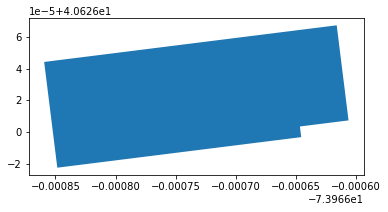

In [38]:
# plotting one building footprint
building_footprints_shp.head(1).plot()

Another popular dataset is NYC's PLUTO dataset. We will use this one because it comes in a zip file.

- Description: Extensive land use and geographic data at the tax lot level in comma–separated values (CSV) file format. The PLUTO files contain more than seventy fields derived from data maintained by city agencies.
- Dataset Link: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page
- Data Dictionary: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=20v1

![building_footprints_csv](images/pluto-csv.png)

## 1.4 Unzipping and reading in data as a csv in memory

In [39]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# reading in our zipfile data in-memory
content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

# printing files in our zipfile
for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [40]:
# read our csv data into a dataframe from our zipfile
pluto_data = pd.read_csv(zf.open('pluto_20v1.csv'), low_memory=False)

# previewing the first five rows of data
pluto_data.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [41]:
rows, columns = pluto_data.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 859,172 rows and 99 columns.


## 1.5 Unzipping and reading in data as csv to local folder

We will retrieve, unzip and read in data in our downloads folder.

In [44]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# a path to our downloads folder 
downloads_path = '../../Downloads/'

# a path to our file from our downloads path
fullfilename = os.path.join(downloads_path, 'PLUTO.gz')

# retrieving data 
urllib.request.urlretrieve(url, fullfilename)

('../../Downloads/PLUTO.gz', <http.client.HTTPMessage at 0x1a915a828>)

In [45]:
# a path to our file from our downloads folder
file_path = '../../Downloads/PLUTO.gz'

# open zipfile and saving items in our zipfolder
items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['pluto_20v1.csv', 'PLUTODD20v1.pdf', 'PlutoReadme20v1.pdf']


In [47]:
# opening zipfile using 'with' keyword in read mode
with zipfile.ZipFile(file_path, 'r') as file:
    file.extractall(downloads_path)

In [49]:
# read our data into a dataframe from our downloads path
pluto_data = pd.read_csv(downloads_path + 'pluto_20v1.csv', low_memory=False)

pluto_data.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [50]:
rows, columns = pluto_data.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 859,172 rows and 99 columns.


## 1.6 Unzipping and reading in data as csv from local folder


**Manually zipping a csv file of the first 20 rows of the data in a zipped file.**

In [51]:
# saving first twenty rows of our data as a new csv
building_footprints_csv.head(20).to_csv('data/sample_buildings.csv', index=False)

In [52]:
file_path = 'data/sample-buidlings.zip'

# create a zipfile
with zipfile.ZipFile(file_path, 'w') as file:
        # write mode overrides all the existing files in the 'Zip.'
        # you have to create the file which you have to write to the 'Zip.'
        file.write('data/sample_buildings.csv', 
                   basename('data/sample_buildings.csv'))

In [53]:
# seeing if a file is a zipfile
print(zipfile.is_zipfile(file_path))

True


In [55]:
# list items in this file path
%ls data/

README.md             sample-buidlings.zip  sample_buildings.csv


In [56]:
# save items in our zipfile
items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['sample_buildings.csv']


**Extracting the csv file of the data from the zipped file.**

In [57]:
file_name = 'data/sample-buidlings.zip'

# opening zip using 'with' keyword in read mode
with zipfile.ZipFile(file_name, 'r') as file:
    # extracing all items in our zipfile
    file.extractall('data/unzipped-data')

In [58]:
# list files in this file path
%ls data/unzipped-data/

sample_buildings.csv


In [59]:
# read data as a dataframe
sample_buidlings = pd.read_csv('data/unzipped-data/sample_buildings.csv')

# previewing first five rows of data
sample_buidlings.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,1925.0,3170958,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,1965.0,5028452,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,1970.0,5078368,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,1928.0,3245111,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,1950.0,4161096,MULTIPOLYGON (((-73.75421559146167 40.75591276...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


In [60]:
rows, columns = sample_buidlings.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 20 rows and 15 columns.


## 1.7 Reading in data from Socrata Open Data API (SODA)

**Note: If you haven't signed up for an app token, there is a 1,000 rows limit.**

![building_footprints_csv](images/building-footprints-soda-api.png)

In [61]:
# Enter the information from those sections here
socrata_domain = 'data.cityofnewyork.us' # nyc open data domain
socrata_dataset_identifier = 'qb5r-6dgf' # building footprints dataset identifier

Source: https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.ipynb

In [62]:
# The main class that interacts with the SODA API. 
# Sample usage:
    # from sodapy import Socrata
    # client = Socrata("opendata.socrata.com", None)
    
client = Socrata(socrata_domain, None)

print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x1cc726a90>
URI Prefix: https://


We are setting the **limit** at **1,000 rows** (i.e. the full data set).

In [63]:
# retrieving data as a dictionary 
results = client.get(socrata_dataset_identifier, limit=1000)

# creating a dataframe from our dictionary
building_footprints_soda_api = pd.DataFrame.from_dict(results)

# printing first five rows of data
building_footprints_soda_api.head()

,cnstrct_yr,bin,the_geom,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource
0,1925,3170958,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2017-08-22T00:00:00.000Z,Constructed,96807,29.74985318,2100,40,0,0,3065220021,3065220021,Photogramm
1,1965,5028452,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2017-08-22T00:00:00.000Z,Constructed,326368,22.63,2100,39,0,0,5012640036,5012640036,Photogramm
2,1970,5078368,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2017-08-22T00:00:00.000Z,Constructed,746627,35.76,2100,51,0,0,5060190091,5060190091,Photogramm
3,1928,3245111,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2017-08-22T00:00:00.000Z,Constructed,786626,37.5,2100,6,0,0,3086910048,3086910048,Photogramm
4,1950,4161096,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2017-08-22T00:00:00.000Z,Constructed,746409,18.01511294,2100,93,0,0,4075020005,4075020005,Photogramm


In [65]:
rows, columns = building_footprints_soda_api.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,000 rows and 14 columns.


In [66]:
# ending our API request
client.close()

**Useful resources:**
    
- API Docs: https://dev.socrata.com/foundry/data.cityofnewyork.us/i62d-kjv8
- Sign up for app token: https://data.cityofnewyork.us/profile/edit/developer_settings
- Python client for the Socrata Open Data API: https://github.com/xmunoz/sodapy
- Examples: https://github.com/xmunoz/sodapy/tree/master/examples

# 2. Writing Out Data

### For simplicity, we're only exporting buildings built from 2010 to 2020

In [67]:
# saving only buildings built between 2010 and 2020 as a new dataframe
building_footprints_after_2010 = building_footprints_csv[building_footprints_csv['CNSTRCT_YR'].between(2010, 2020)]

# reset our index
building_footprints_after_2010 = building_footprints_after_2010.reset_index(drop=True)

# previewing first five rows of data
building_footprints_after_2010.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2013.0,1022662,MULTIPOLYGON (((-73.98406915139554 40.75857096...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.930000,2100.0,49.0,0,0,1.009990e+09,1.009990e+09,Photogramm
1,2011.0,3394834,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
2,2010.0,4540159,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
3,2010.0,4260357,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,08/10/2017 12:00:00 AM +0000,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
4,2010.0,4540051,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm


In [69]:
rows, columns = building_footprints_after_2010.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,182 rows and 15 columns.


In [70]:
# sorting our construction year values and printing the unique values
building_footprints_after_2010.sort_values(by='CNSTRCT_YR').CNSTRCT_YR.unique()

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.])

In [71]:
# list items in data folder
%ls data/

README.md             sample_buildings.csv
sample-buidlings.zip  unzipped-data/


## 2.1 Writing to a CSV file

In [72]:
# writing files as a csv
building_footprints_after_2010.to_csv('data/building_after_2010.csv', index=False)

# listing items in data folder
%ls data/

README.md                sample-buidlings.zip     unzipped-data/
building_after_2010.csv  sample_buildings.csv


## 2.2 Writing to an Excel (xlsx) file

In [73]:
# writing files as an excel file
building_footprints_after_2010.to_excel('data/building_after_2010.xlsx', index=False)

# listing items in data folder
%ls data/

README.md                 building_after_2010.xlsx  sample_buildings.csv
building_after_2010.csv   sample-buidlings.zip      unzipped-data/


## 2.3 Writing to a JSON file

In [74]:
# writing files as json
building_footprints_after_2010.to_json('data/building_after_2010.json')

# listing items in data folder
%ls data/

README.md                 building_after_2010.xlsx  unzipped-data/
building_after_2010.csv   sample-buidlings.zip
building_after_2010.json  sample_buildings.csv


# 3. Reading In Data from Local Folder

In [75]:
# listing items in data folder
%ls data/

README.md                 building_after_2010.xlsx  unzipped-data/
building_after_2010.csv   sample-buidlings.zip
building_after_2010.json  sample_buildings.csv


## 3.1 Reading in a CSV file

In [76]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_csv('data/building_after_2010.csv')

# previewing first five rows in data
building_footprints_after_2010.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2013.0,1022662,MULTIPOLYGON (((-73.98406915139554 40.75857096...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.930000,2100.0,49.0,0,0,1.009990e+09,1.009990e+09,Photogramm
1,2011.0,3394834,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
2,2010.0,4540159,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
3,2010.0,4260357,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,08/10/2017 12:00:00 AM +0000,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
4,2010.0,4540051,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm


In [77]:
rows, columns = building_footprints_after_2010.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,182 rows and 15 columns.


## 3.2 Reading in an Excel file

In [78]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_excel('data/building_after_2010.xlsx')

# previewing first five rows in data
building_footprints_after_2010.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2013,1022662,MULTIPOLYGON (((-73.98406915139554 40.75857096...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.930000,2100.0,49.0,0,0,1.009990e+09,1.009990e+09,Photogramm
1,2011,3394834,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
2,2010,4540159,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
3,2010,4260357,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,08/10/2017 12:00:00 AM +0000,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
4,2010,4540051,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm


In [81]:
rows, columns = building_footprints_after_2010.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,182 rows and 15 columns.


## 3.3 Reading in a JSON file

In [82]:
# read data as a dataframe
building_footprints_after_2010 = pd.read_json('data/building_after_2010.json')

# previewing first five rows in data
building_footprints_after_2010.head()

,CNSTRCT_YR,BIN,the_geom,NAME,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,2013,1022662,MULTIPOLYGON (((-73.98406915139554 40.75857096...,None,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.930000,2100.0,49.0,0,0,1.009990e+09,1.009990e+09,Photogramm
1,2011,3394834,MULTIPOLYGON (((-73.87172426474349 40.65519420...,None,08/22/2017 12:00:00 AM +0000,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
2,2010,4540159,MULTIPOLYGON (((-73.86650099829305 40.74236058...,None,08/22/2017 12:00:00 AM +0000,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
3,2010,4260357,MULTIPOLYGON (((-73.7940773567428 40.680625171...,None,08/10/2017 12:00:00 AM +0000,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
4,2010,4540051,MULTIPOLYGON (((-73.87805078807256 40.71475698...,None,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm


In [83]:
rows, columns = building_footprints_after_2010.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,182 rows and 15 columns.


# 4. Conclusion

In this notebook, we reviewed various ways to read (load) and write (save) data from NYC Open Data. Specifically, we focused on reading our data into a pandas dataframe. We also went over common file formats that you might encounter - csv, json, shapefiles, and zip files. In Part II, we will focus on basic data inspection and wrangling techniques in the data analysis workflow.